In [1]:
# Numbers
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from IPython.display import Image, display

# Machine Learning
from sklearn.decomposition import PCA

# Misc
seed_number = 42
import os

In [2]:
HDB_string = '99co_scrape_2021-11-26 - HDB.csv'
Condo_string = '99co_scrape_2021-11-27 - Condo.csv'
EC_string = '99co_scrape_2021-11-27 - EC.csv'
Landed_string = '99co_scrape_2021-11-27 - Landed.csv'

In [3]:
df_hdb = pd.read_csv(HDB_string)
df_condo = pd.read_csv(Condo_string)
df_ec = pd.read_csv(EC_string)
df_landed = pd.read_csv(Landed_string)

In [4]:
def inspect_df(df):
    print('\n','*'*35)
    print('Printing info on DataFrame','\n')
    print('*'*35,'\n')
    df.info()
    
    print('\n','*'*35)
    print('Printing random 5 values','\n')
    print('*'*35,'\n')
    display(df.sample(5,random_state = seed_number))
    
    print('\n','*'*35)
    print('Printing Statistics on DataFrame','\n')
    print('*'*35,'\n')
    display(df.describe().T)
    
    print('\n','*'*35)
    print('Inspecting missing values on DataFrame','\n')
    print('*'*35,'\n')
    print(df.isna().sum())

    print('\n','*'*35)
    print('Inspecting missing values on DataFrame','\n')
    print('*'*35,'\n')
    msno.matrix(df)
    plt.show()

Inspecting hdb dataset


 ***********************************
Printing info on DataFrame 

*********************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5424 entries, 0 to 5423
Data columns (total 7 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Name_of_Property                                         5424 non-null   object
 1   Price                                                    5424 non-null   object
 2   Web Link                                                 5424 non-null   object
 3   Misc Details                                             5424 non-null   object
 4   Everything in Property Details and Development Overview  5424 non-null   object
 5   Amenities                                                5424 non-null   object
 6   Closeness to MRT and Insights                            5424 non-null   object
dtypes: object(7)
memory

,Name_of_Property,Price,Web Link,Misc Details,Everything in Property Details and Development Overview,Amenities,Closeness to MRT and Insights
5274,3 Bed HDB in 109 Bishan Street 12,"$679,000",http://99.co/singapore/sale/property/109-bisha...,"['3 Beds', '2 Baths', '1,130 sqft']",['Price/sqft$600.88 psfNo. of bedrooms3Built y...,[],"['10 min (445 m) from Bishan MRT', 'This prope..."
5214,3 Room HDB in 671 Jalan Damai,"$590,000",http://99.co/singapore/sale/property/671-jalan...,"['3 Beds', '2 Baths', '1,150 sqft']",['Price/sqft$513.04 psfNo. of bedrooms3Built y...,[],['This property costs 63% less than the avg. 3...
3167,3 Bed HDB in 218 Jurong East Street 21,"$468,000",http://99.co/singapore/sale/property/218-juron...,"['3 Beds', '2 Baths', '979 sqft']",['Price/sqft$478.04 psfNo. of bedrooms3Built y...,[],"['15 min (871 m) from Chinese Garden MRT', 'Th..."
4003,5 Room HDB in 630 Senja Road,"$780,000",http://99.co/singapore/sale/property/630-senja...,"['3 Beds', '2 Baths', '1,184 sqft']",['Price/sqft$658.78 psfFloor levelHighNo. of b...,"['Bomb shelter', 'Corner unit', 'Renovated']","['10 min (467 m) from Senja MRT', 'This proper..."
1564,3 Room HDB in 179 Toa Payoh Central,"$555,000",http://99.co/singapore/sale/property/179-toa-p...,"['3 Beds', '2 Baths', '904 sqft']",['Price/sqft$613.94 psfNo. of bedrooms3Built y...,[],"['5 min (285 m) from Toa Payoh MRT', 'This pro..."



 ***********************************
Printing Statistics on DataFrame 

*********************************** 



,count,unique,top,freq
Name_of_Property,5424,4189,5 Room HDB in 630 Senja Road,20
Price,5424,523,"$550,000",135
Web Link,5424,5424,http://99.co/singapore/sale/property/403-seran...,1
Misc Details,5424,777,"['3 Beds', '2 Baths', '990 sqft']",285
Everything in Property Details and Development Overview,5424,5334,['Price/sqft$658.78 psfFloor levelHighNo. of b...,6
Amenities,5424,236,[],3929
Closeness to MRT and Insights,5424,4167,"['10 min (467 m) from Senja MRT', 'This proper...",22



 ***********************************
Inspecting missing values on DataFrame 

*********************************** 

Name_of_Property                                           0
Price                                                      0
Web Link                                                   0
Misc Details                                               0
Everything in Property Details and Development Overview    0
Amenities                                                  0
Closeness to MRT and Insights                              0
dtype: int64

 ***********************************
Inspecting missing values on DataFrame 

*********************************** 



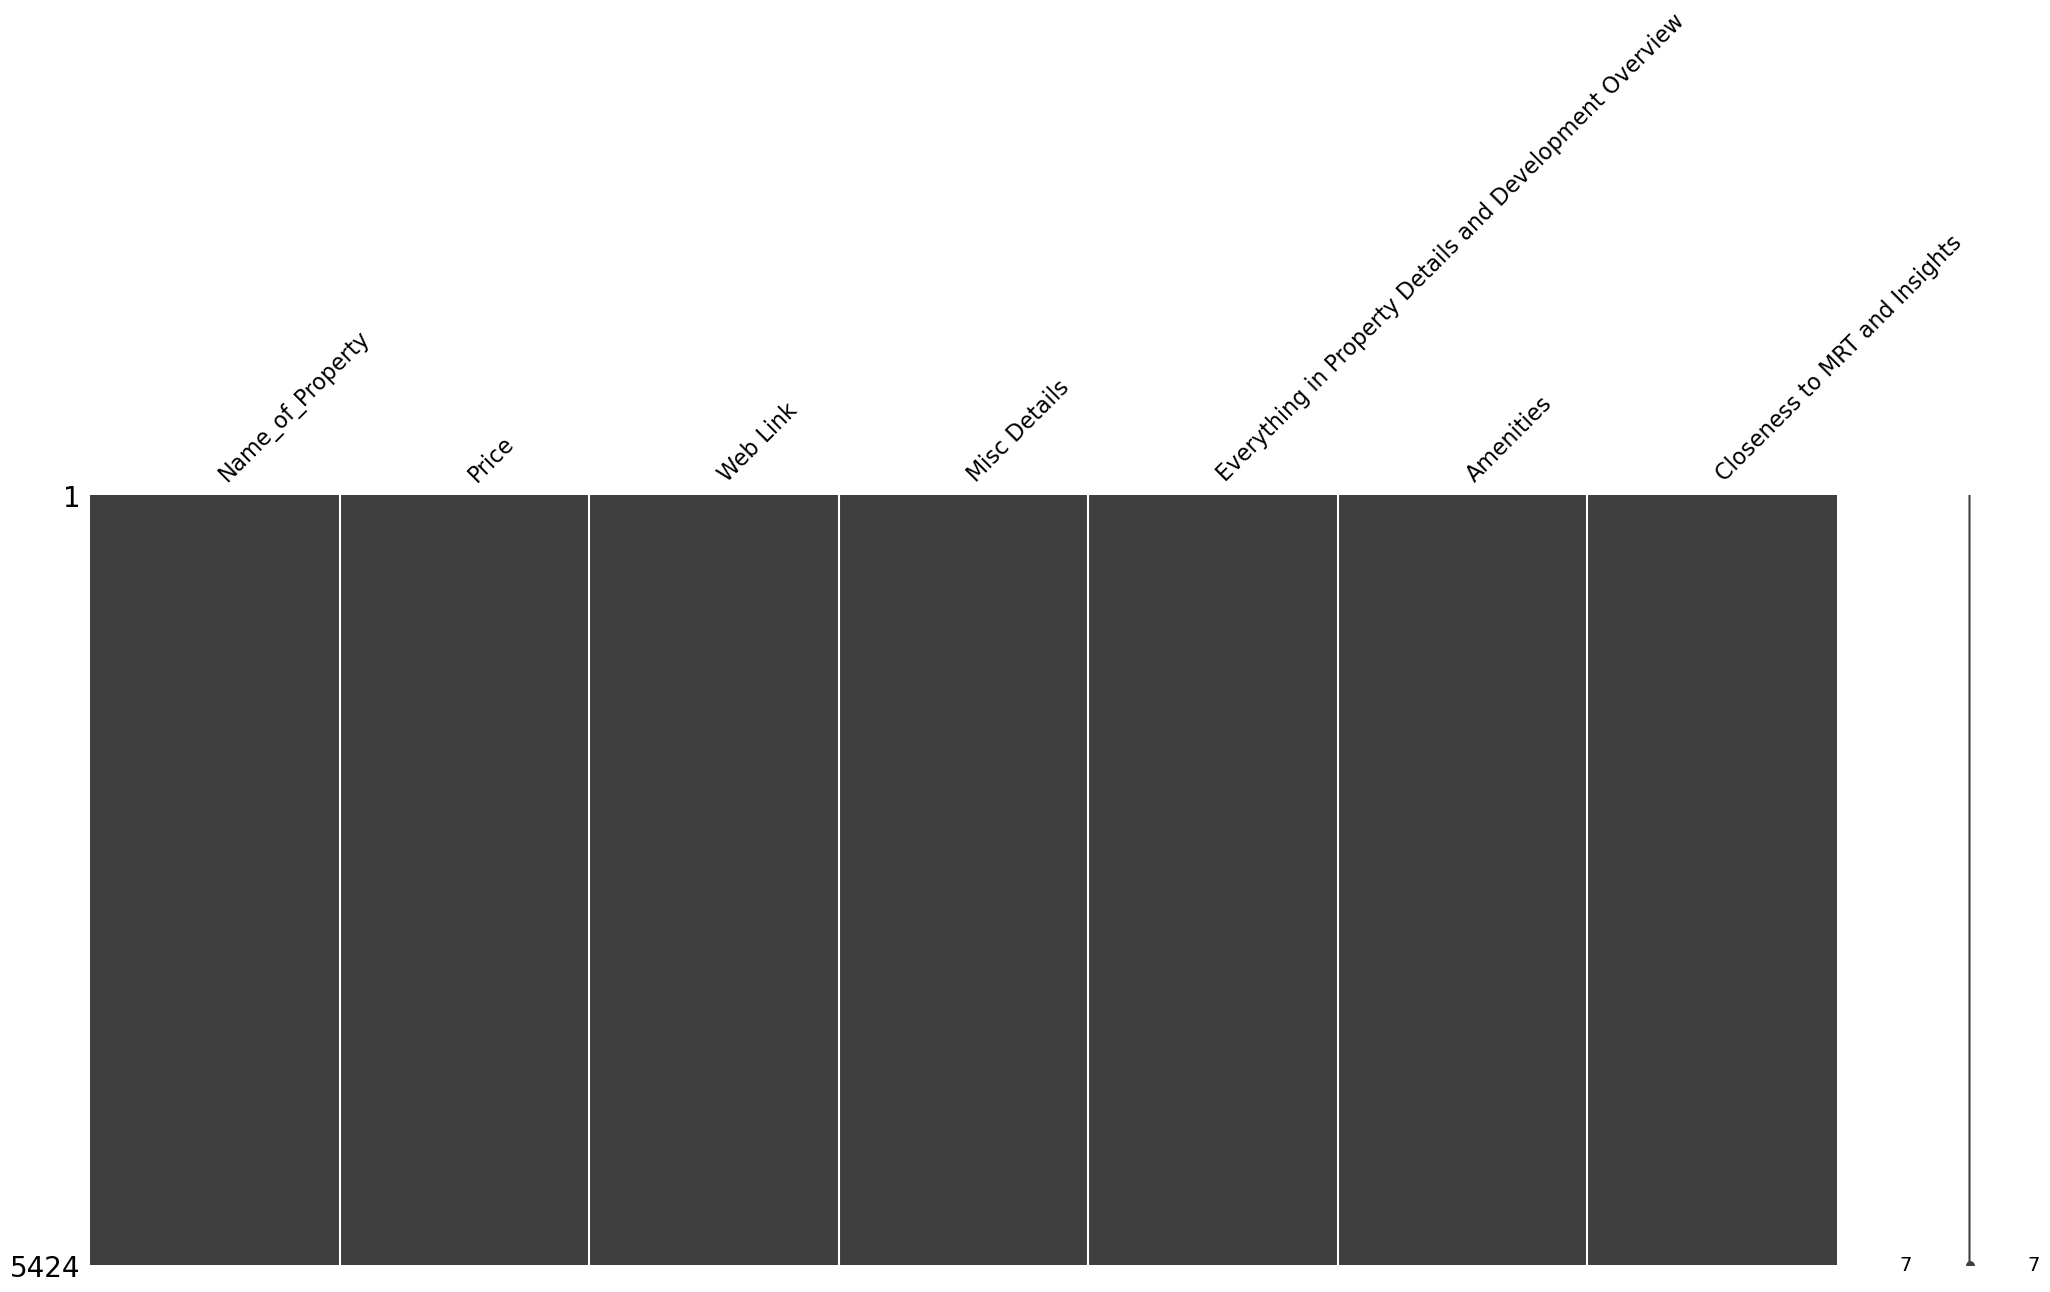

In [5]:
inspect_df(df_hdb)

Scraping of the data resulted in some invalid values, we need to explore what are the values that are invalid.

A few things were noted:
- Columns 4 to 7 included strings like [,] and , and ' which needed to be removed
- Price included $ which needed to be removed
- Multiple values included in 1, 4 , 5 , 6 and 7

New Columns to be created include
 - Address from name of property
 - Property Type

Possible Issue
- It is not possible to predict the price of a property if the given values given are not associated with the particular property.
- Duplicate values may exist 

Example: Use the amentities like gym, pool to predict the price of a HDB as a HDB does not have those amenities

| Variable | Definition | Type |
| --- | --- | :-: |
|Price(Predict value)|	Price of Property|	Int
|Property Type	| Type of Property, i.e 5rm HDB, Condo, Landed|	String
|Address	| Address of the Property	| String
|BedRoom	| Number of bedrooms in Property	| Int
|Toilets	| Number of toilets in Property| Int
|Property Size	| Area of property (interior) in square feet	| Int
|Land Size	| Area of property (exterior) in square feet	| Int
|Amenities	|# of amenities included in the property	| String
|Closeness to MRT	| Distance to closest MRT in minutes	| Int
|District	| Region of Singapore	| Int
|Floor Level	| Height of apartment	| Category (Low, Medium, High)
|Neighbourhood	| Distance to closest MRT in minutes	| Int
|Age of Flat	| Land Lease - Year built, age of the flat in years	| Int

Examples of information from website

Amenities_condo.png


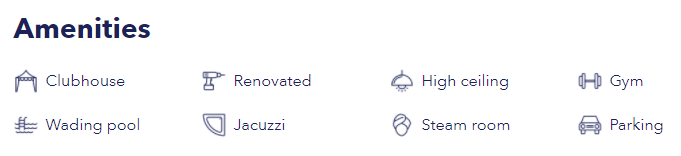

Amenities_hdb.png


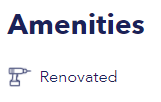

Amenities_landed.png


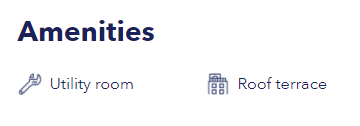

development_condo.png


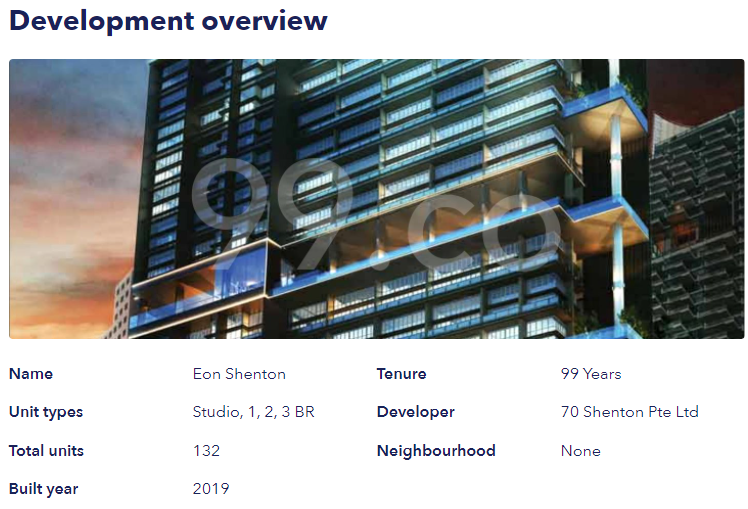

development_hdb.png


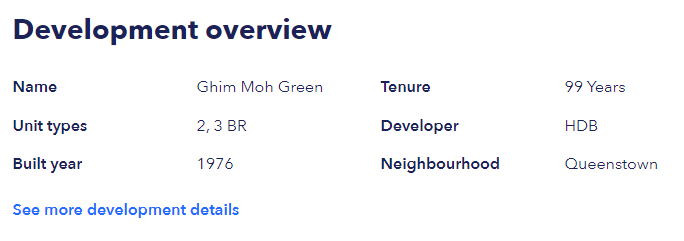

Header_condo.png


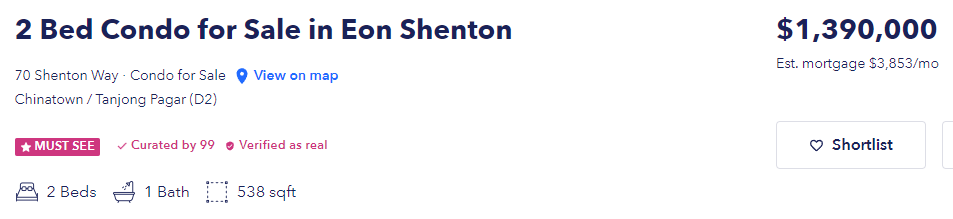

Header_hdb.png


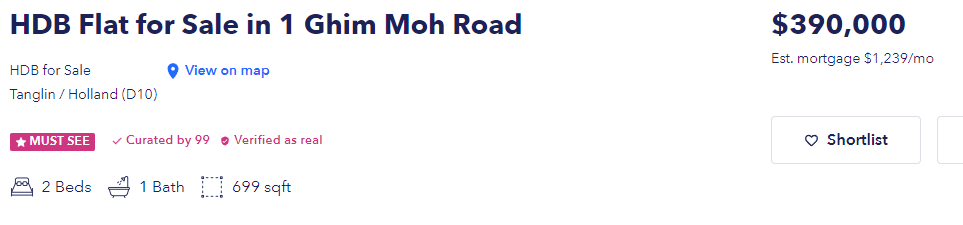

Header_landed.png


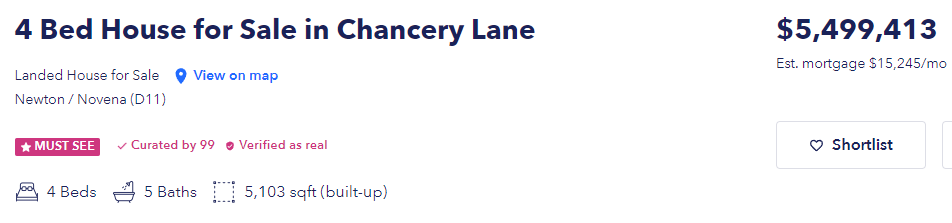

Insights_condo.png


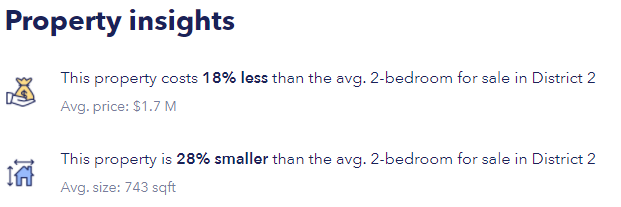

Insights_hdb.png


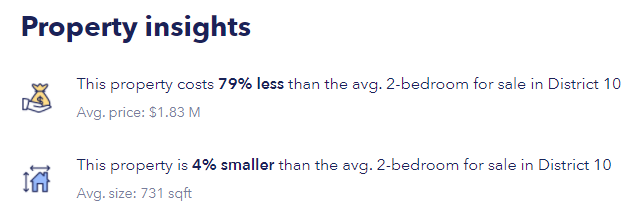

Insights_landed.png


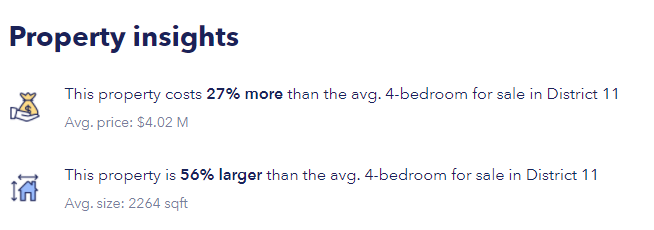

Property_details_condo.png


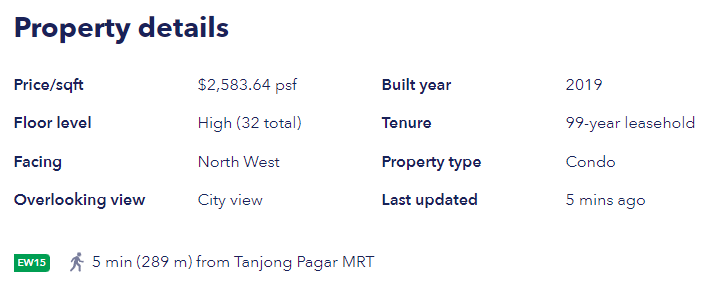

Property_details_hdb.png


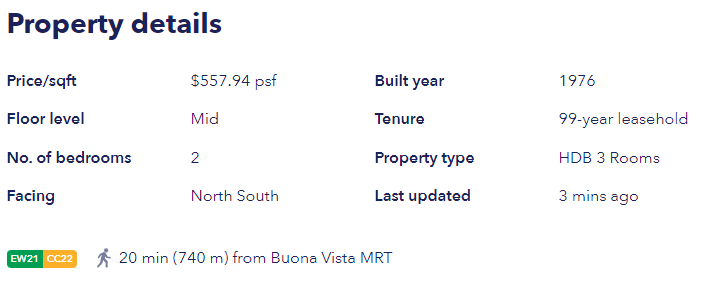

In [6]:
images = []
for img in os.listdir('./Images'):
    if '.png' in img:
        print(img)
        display(Image(os.path.join('Images',img)))

In [7]:
df_hdb.head()

,Name_of_Property,Price,Web Link,Misc Details,Everything in Property Details and Development Overview,Amenities,Closeness to MRT and Insights
0,3 Room HDB in 180B Boon Lay Drive,"$400,000",http://99.co/singapore/sale/property/180b-boon...,"['2 Beds', '2 Baths', '732 sqft']",['Price/sqft$546.45 psfFloor levelHighNo. of b...,"['Bomb shelter', 'Corner unit', 'Renovated']",['This property costs 61% less than the avg. 2...
1,4 Room HDB in 113C Mcnair Road,"$918,000",http://99.co/singapore/sale/property/113c-mcna...,"['3 Beds', '2 Baths', '1,001 sqft']",['Price/sqft$917.08 psfFloor levelHighNo. of b...,['Bomb shelter'],"['5 min (228 m) from Boon Keng MRT', 'This pro..."
2,5 Room HDB in 452B Sengkang West Way,"$668,888",http://99.co/singapore/sale/property/452b-seng...,"['3 Beds', '3 Baths', '12,847 sqft']",['Price/sqft$52.07 psfFloor levelTopNo. of bed...,"['Utility room', 'Corner unit', 'Renovated', '...","['5 min (301 m) from Fernvale MRT', 'This prop..."
3,3 Room HDB in 308 Shunfu Road,"$530,000",http://99.co/singapore/sale/property/308-shunf...,"['2 Beds', '2 Baths', '721 sqft']",['Price/sqft$735.09 psfNo. of bedrooms2FacingN...,['Renovated'],"['5 min (246 m) from Marymount MRT', 'This pro..."
4,3 Room HDB in 311B Clementi Avenue 4,"$719,000",http://99.co/singapore/sale/property/311b-clem...,"['3 Beds', '2 Baths', '861 sqft']",['Price/sqft$835.08 psfNo. of bedrooms3FacingN...,"['Bomb shelter', 'Renovated', 'Playground', 'F...","['10 min (460 m) from Clementi MRT', 'This pro..."


## Checking for Duplicates

In [8]:
df_hdb[df_hdb.duplicated(subset=['Name_of_Property', 'Misc Details','Everything in Property Details and Development Overview','Amenities','Closeness to MRT and Insights'])]

,Name_of_Property,Price,Web Link,Misc Details,Everything in Property Details and Development Overview,Amenities,Closeness to MRT and Insights
541,4 Room HDB in 302 Jurong East Street 32,"$460,000",http://99.co/singapore/sale/property/302-juron...,"['3 Beds', '2 Baths', '1,033 sqft']",['Price/sqft$445.3 psfNo. of bedrooms3Overlook...,"['Greenery view', 'Renovated']","['5 min (328 m) from Chinese Garden MRT', 'Thi..."
769,4 Room HDB in 275B Compassvale Link,"$668,000",http://99.co/singapore/sale/property/275b-comp...,"['3 Beds', '2 Baths', '990 sqft']",['Price/sqft$674.75 psfNo. of bedrooms3Furnish...,['Corner unit'],"['5 min (220 m) from Buangkok MRT', 'This prop..."
874,4 Room HDB in 55 Teban Gardens Road,"$699,000",http://99.co/singapore/sale/property/55-teban-...,"['3 Beds', '2 Baths', '990 sqft']",['Price/sqft$706.06 psfNo. of bedrooms3FacingS...,[],['This property costs 10% more than the avg. 3...
1084,4 Room HDB in 365B Upper Serangoon Road,"$750,000",http://99.co/singapore/sale/property/365b-uppe...,"['3 Beds', '2 Baths', '990 sqft']",['Price/sqft$757.58 psfNo. of bedrooms3Furnish...,"['Bomb shelter', 'Fibre ready', 'Renovated']","['15 min (780 m) from Hougang MRT', 'This prop..."
1400,3 Room HDB in 271 Queen Street,"$478,000",http://99.co/singapore/sale/property/271-queen...,"['2 Beds', '2 Baths', '645 sqft']",['Price/sqft$741.09 psfNo. of bedrooms2Furnish...,[],"['5 min (249 m) from Bugis MRT', 'This propert..."
...,...,...,...,...,...,...,...
5301,3 Bed HDB in 63B Lengkok Bahru,"$850,000",http://99.co/singapore/sale/property/63b-lengk...,"['3 Beds', '2 Baths', '1,302 sqft']",['Price/sqft$652.84 psfNo. of bedrooms3Built y...,[],"['5 min (174 m) from Redhill MRT', 'This prope..."
5311,5 Room HDB in 1 Delta Avenue,"$900,000",http://99.co/singapore/sale/property/1-delta-a...,"['3 Beds', '2 Baths', '1,280 sqft']",['Price/sqft$703.12 psfNo. of bedrooms3Built y...,[],"['20 min (920 m) from Tiong Bahru MRT', 'This ..."
5360,5 Room HDB in 258C Compassvale Road,"$620,000",http://99.co/singapore/sale/property/258c-comp...,"['3 Beds', '2 Baths', '1,184 sqft']",['Price/sqft$523.65 psfNo. of bedrooms3Built y...,"['Corner unit', 'Renovated']","['5 min (313 m) from Compassvale MRT', 'This p..."
5399,3 Bed HDB in 275B Compassvale Link,"$600,000",http://99.co/singapore/sale/property/275b-comp...,"['3 Beds', '2 Baths', '968 sqft']",['Price/sqft$619.83 psfNo. of bedrooms3Built y...,[],"['5 min (220 m) from Buangkok MRT', 'This prop..."


78 Duplicated rows

In [9]:
df_hdb = df_hdb[~df_hdb.duplicated(subset=['Name_of_Property', 'Misc Details','Everything in Property Details and Development Overview','Amenities','Closeness to MRT and Insights'])]

In [10]:
df_hdb.reset_index(inplace = True, drop = True)

In [11]:
df_hdb.count()

Name_of_Property                                           5346
Price                                                      5346
Web Link                                                   5346
Misc Details                                               5346
Everything in Property Details and Development Overview    5346
Amenities                                                  5346
Closeness to MRT and Insights                              5346
dtype: int64

## Extracting Price

In [12]:
df_hdb['Price'].str.replace('$','').str.replace(',','').astype(int)

0       400000
1       918000
2       668888
3       530000
4       719000
         ...  
5341    498000
5342    621000
5343    950000
5344    480000
5345    868000
Name: Price, Length: 5346, dtype: int32

In [13]:
df_hdb['Price'] = df_hdb['Price'].str.replace('$','').str.replace(',','').astype(int)

## Extracting Address

In [14]:
df_hdb['Name_of_Property'].str.extract(r'(in).(.*)')[1]

0            180B Boon Lay Drive
1               113C Mcnair Road
2         452B Sengkang West Way
3                308 Shunfu Road
4         311B Clementi Avenue 4
                  ...           
5341    687D Choa Chu Kang Drive
5342       348B Yishun Avenue 11
5343        257 Bishan Street 22
5344       1 Tanjong Pagar Plaza
5345        292 Bishan Street 22
Name: 1, Length: 5346, dtype: object

In [15]:
df_hdb['Address'] = df_hdb['Name_of_Property'].str.extract(r'(in).(.*)')[1]

In [16]:
df_hdb['Address'].value_counts()

630 Senja Road                    26
530D Pasir Ris Drive 1            18
117A Jalan Tenteram               18
6 Farrer Road                     14
194B Bukit Batok West Avenue 6    13
                                  ..
881 Woodlands Street 82            1
231 Choa Chu Kang Central          1
669 Woodlands Ring Road            1
125 Geylang East Avenue 1          1
308 Jurong East Street 32          1
Name: Address, Length: 2895, dtype: int64

## Property Type

In [17]:
df_hdb['Name_of_Property'].str.extract(r'(.*(HDB))')[0]

0       3 Room HDB
1       4 Room HDB
2       5 Room HDB
3       3 Room HDB
4       3 Room HDB
           ...    
5341     3 Bed HDB
5342    4 Room HDB
5343     4 Bed HDB
5344    3 Room HDB
5345     3 Bed HDB
Name: 0, Length: 5346, dtype: object

In [18]:
df_hdb['Name_of_Property'].str.extract(r'(.*(HDB))')[0].value_counts()

3 Bed HDB     1352
3 Room HDB    1105
4 Room HDB     988
5 Room HDB     731
2 Bed HDB      415
2 Room HDB     247
Exec HDB       236
4 Bed HDB      225
1 Bed HDB       24
Studio HDB      11
5 Bed HDB        7
6 Bed HDB        5
Name: 0, dtype: int64

Inconsistent naming convention, some are called rooms some are called bed, some 1 Bed room is called studio

In [19]:
df_hdb['Property_type']= df_hdb['Name_of_Property'].str.extract(r'(.*(HDB))')[0]

In [20]:
df_hdb['Property_type'].str.replace('1 Bed','Studio').str.replace('Bed','Room')

0       3 Room HDB
1       4 Room HDB
2       5 Room HDB
3       3 Room HDB
4       3 Room HDB
           ...    
5341    3 Room HDB
5342    4 Room HDB
5343    4 Room HDB
5344    3 Room HDB
5345    3 Room HDB
Name: Property_type, Length: 5346, dtype: object

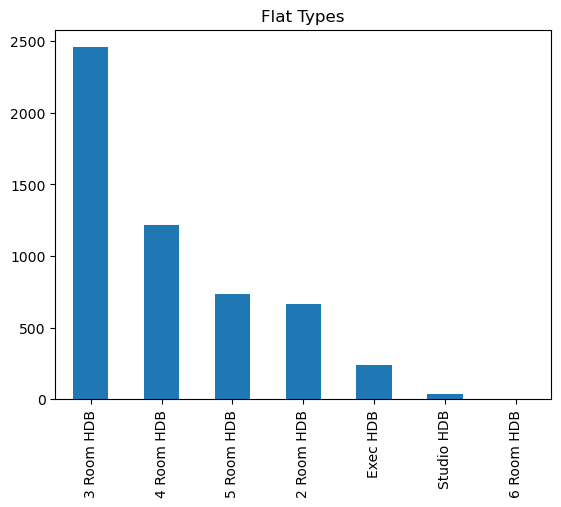

In [21]:
df_hdb['Property_type'].str.replace('1 Bed','Studio').str.replace('Bed','Room').value_counts().plot(kind='bar', title = 'Flat Types')
plt.show()

In [22]:
df_hdb['Property_type'] = df_hdb['Property_type'].str.replace('1 Bed','Studio').str.replace('Bed','Room')

## Property Size

In [23]:
df_hdb['Misc Details'].str.replace(',','').str.extract(r'(\w{3,4}).(sqft)')[0].astype(int)

0        732
1       1001
2       2847
3        721
4        861
        ... 
5341    1184
5342     990
5343    1571
5344     635
5345    1302
Name: 0, Length: 5346, dtype: int32

In [24]:
df_hdb['Property_Size'] = df_hdb['Misc Details'].str.replace(',','').str.extract(r'(\w{3,4}).(sqft)')[0].astype(int)

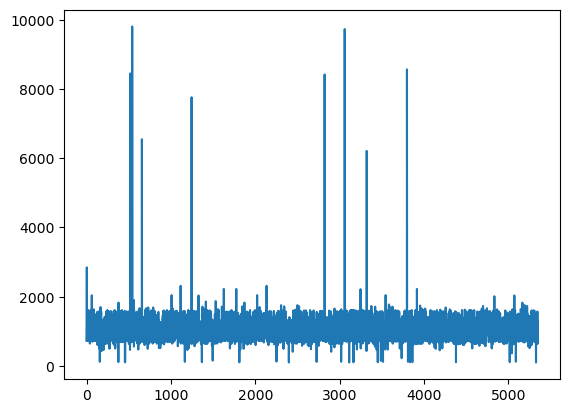

In [25]:
df_hdb['Property_Size'].plot()
plt.show()

In [26]:
df_hdb[df_hdb.Property_Size < 500]

,Name_of_Property,Price,Web Link,Misc Details,Everything in Property Details and Development Overview,Amenities,Closeness to MRT and Insights,Address,Property_type,Property_Size
153,2 Room HDB in 209C Punggol Place,315000,http://99.co/singapore/sale/property/209c-pung...,"['1 Bed', '1 Bath', '495 sqft']",['Price/sqft$636.36 psfFloor levelHighNo. of b...,[],"['15 min (806 m) from Compassvale MRT', 'This ...",209C Punggol Place,2 Room HDB,495
156,5 Room HDB in 60 New Upper Changi Road,650000,http://99.co/singapore/sale/property/60-new-up...,"['3 Beds', '2 Baths', '118 sqft']","['Price/sqft$5,508.47 psfFloor levelMidNo. of ...",[],"['15 min (1159 m) from Tanah Merah MRT', 'This...",60 New Upper Changi Road,5 Room HDB,118
176,2 Room HDB in 160 Lorong 1 Toa Payoh,250000,http://99.co/singapore/sale/property/160-loron...,"['1 Bed', '430 sqft']",['Price/sqft$581.4 psfNo. of bedrooms1FacingSo...,[],"['10 min (364 m) from Toa Payoh MRT', 'This pr...",160 Lorong 1 Toa Payoh,2 Room HDB,430
201,2 Room HDB in 424A Yishun Avenue 11,300000,http://99.co/singapore/sale/property/424a-yish...,"['1 Bed', '1 Bath', '461 sqft']",['Price/sqft$650.76 psfFloor levelHighNo. of b...,[],['This property costs 57% less than the avg. 1...,424A Yishun Avenue 11,2 Room HDB,461
376,5 Room HDB in 469A Sengkang West Way,598000,http://99.co/singapore/sale/property/469a-seng...,"['3 Beds', '113 sqft']","['Price/sqft$5,292.04 psfNo. of bedrooms3Built...",[],"['5 min (336 m) from Thanggam MRT', 'This prop...",469A Sengkang West Way,5 Room HDB,113
454,5 Room HDB in 308B Punggol Walk,750000,http://99.co/singapore/sale/property/308b-pung...,"['3 Beds', '112 sqft']","['Price/sqft$6,696.43 psfNo. of bedrooms3Built...",[],"['5 min (136 m) from Sumang MRT', 'This proper...",308B Punggol Walk,5 Room HDB,112
456,4 Room HDB in 403 Serangoon Avenue 1,628000,http://99.co/singapore/sale/property/403-seran...,"['3 Beds', '105 sqft']","['Price/sqft$5,980.95 psfNo. of bedrooms3Built...",[],"['5 min (319 m) from Serangoon MRT', 'This pro...",403 Serangoon Avenue 1,4 Room HDB,105
514,2 Room HDB in 805 King George's Avenue,288000,http://99.co/singapore/sale/property/805-king-...,"['1 Bed', '1 Bath', '463 sqft']",['Price/sqft$622.03 psfNo. of bedrooms1Built y...,[],"['5 min (263 m) from Lavender MRT', 'This prop...",805 King George's Avenue,2 Room HDB,463
612,2 Room HDB in 672C Edgefield Plains,300000,http://99.co/singapore/sale/property/672c-edge...,"['1 Bed', '1 Bath', '473 sqft']",['Price/sqft$634.25 psfFloor levelHighNo. of b...,['Bomb shelter'],"['10 min (444 m) from Damai MRT', 'This proper...",672C Edgefield Plains,2 Room HDB,473
724,2 Room HDB in 83 Commonwealth Close,288000,http://99.co/singapore/sale/property/83-common...,"['1 Bed', '495 sqft']",['Price/sqft$581.82 psfNo. of bedrooms1Built y...,[],"['5 min (337 m) from Commonwealth MRT', 'This ...",83 Commonwealth Close,2 Room HDB,495


In [27]:
df_hdb.iloc[5327][2]

'http://99.co/singapore/sale/property/155-lorong-1-toa-payoh-hdb-3b784zxSvFghzcexaV5qFV#enquiry_position--7926+enquiry_source--Search'

The listing appears to be in square meters rather than in square feet

## Bedrooms

In [28]:
df_hdb['Misc Details'].str.replace(',','').str.extract(r'(\w).(Bed)')[0]

0       2
1       3
2       3
3       2
4       3
       ..
5341    3
5342    3
5343    4
5344    2
5345    3
Name: 0, Length: 5346, dtype: object

In [29]:
df_hdb['Bedrooms'] = df_hdb['Misc Details'].str.replace(',','').str.extract(r'(\w).(Bed)')[0]

In [30]:
df_hdb['Misc Details'].str.replace(',','').str.extract(r'(\w).(Baths)')[0]

0         2
1         2
2         3
3         2
4         2
       ... 
5341      2
5342      2
5343      3
5344    NaN
5345      2
Name: 0, Length: 5346, dtype: object

## Toilets

In [31]:
df_hdb['Everything in Property Details and Development Overview'].str.replace(',','')#.str.extract(r'(\w).(Baths)')[0]

0       ['Price/sqft$546.45 psfFloor levelHighNo. of b...
1       ['Price/sqft$917.08 psfFloor levelHighNo. of b...
2       ['Price/sqft$52.07 psfFloor levelTopNo. of bed...
3       ['Price/sqft$735.09 psfNo. of bedrooms2FacingN...
4       ['Price/sqft$835.08 psfNo. of bedrooms3FacingN...
                              ...                        
5341    ['Price/sqft$420.61 psfNo. of bedrooms3Built y...
5342    ['Price/sqft$627.27 psfNo. of bedrooms3Built y...
5343    ['Price/sqft$604.71 psfNo. of bedrooms4Built y...
5344    ['Price/sqft$755.91 psfNo. of bedrooms2Built y...
5345    ['Price/sqft$666.67 psfNo. of bedrooms3Built y...
Name: Everything in Property Details and Development Overview, Length: 5346, dtype: object

In [32]:
df_hdb['Toilets'] = df_hdb['Misc Details'].str.replace(',','').str.extract(r'(\w).(Baths)')[0]

## Everything else in Property Details and Development Overview

In [33]:
print(df_hdb.iloc[:,4][0])

['Price/sqft$546.45 psfFloor levelHighNo. of bedrooms2FurnishingUnfurnishedFacingSouth East', 'Overlooking viewGarden viewBuilt year2014Tenure99-year leaseholdProperty typeHDB 3 Rooms Last updated1 hr ago', 'NameBoon Lay Meadow Unit types1, 2, 3, 4 BRBuilt year2014', 'Tenure99 YearsDeveloperHDBNeighbourhoodJurong West ']


Information to be extracted from column under 'Everything in Property Details and Development Overview'
- Price /sqft
- Floor Level
- Built Year
- Lease 
- Facing 
- Dev_Name
- Dev_unit_types
- Dev_built_year
- Dev_lease
- Dev
- Neighbourhood

## Lease

In [42]:
df_hdb['Everything in Property Details and Development Overview'].str.extract(r'(Tenure)(\w{2,3})(-year lease)')[1]

0        99
1        99
2        99
3        99
4        99
       ... 
5341    NaN
5342     99
5343    NaN
5344     99
5345     99
Name: 1, Length: 5346, dtype: object

## Amenities

In [43]:
df_hdb['Everything in Property Details and Development Overview'][5341]

"['Price/sqft$420.61 psfNo. of bedrooms3Built year2003', 'Property typeHDB Last updated2 mths ago', 'Name687D Choa Chu Kang Drive Total units115', 'Built year2003NeighbourhoodChoa Chu Kang ']"

In [34]:
df_hdb.Amenities.str.replace("'","").str.replace("[","").str.replace("]","")

0                    Bomb shelter, Corner unit, Renovated
1                                            Bomb shelter
2       Utility room, Corner unit, Renovated, Bomb she...
3                                               Renovated
4       Bomb shelter, Renovated, Playground, Fitness c...
                              ...                        
5341                                                     
5342                                                     
5343                                                     
5344                                                     
5345                                                     
Name: Amenities, Length: 5346, dtype: object

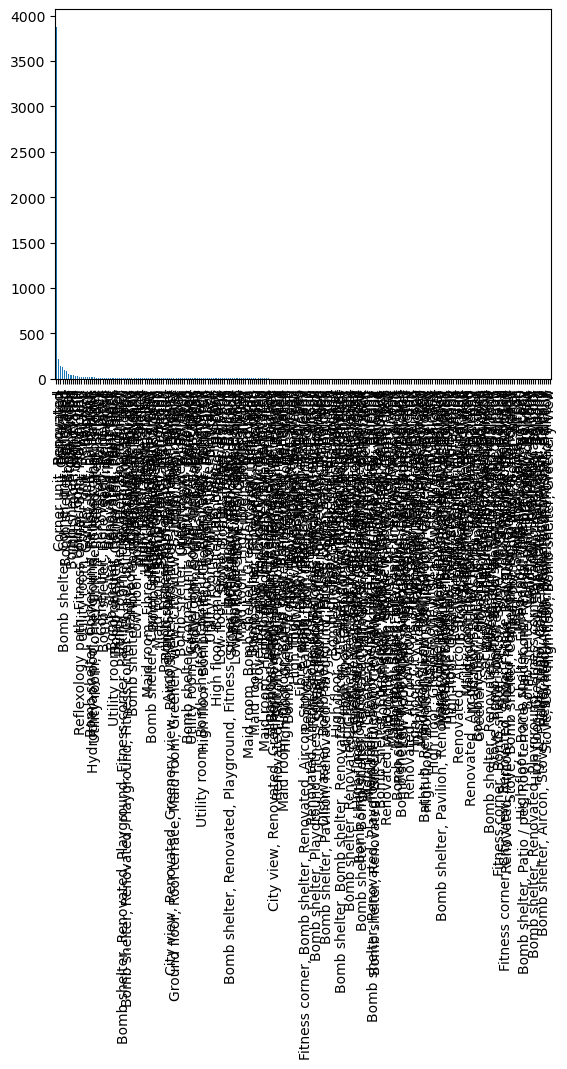

In [35]:
df_hdb.Amenities.str.replace("'","").str.replace("[","").str.replace("]","").value_counts().plot(kind='bar')
plt.show()